**1. Importing libraries and data**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [ ]:
#reading the file data
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
#displaying first 5 rows
data.head(5)

ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]

In [ ]:
#displaying bottom 5 rows
data.tail()

ID  Age  Experience  ...  CD Account  Online  CreditCard
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5 rows x 14 columns]

In [ ]:
#displaying the columns
data.columns = ['ID','Age','Experience','Income','ZIPcode','Family','CCAvg','Education','Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPcode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
data.shape

(5000, 14)

In [ ]:
#to display the summery stats which include count,mean,std,min,max
data.describe()

ID          Age  ...       Online   CreditCard
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean   2500.500000    45.338400  ...     0.596800     0.294000
std    1443.520003    11.463166  ...     0.490589     0.455637
min       1.000000    23.000000  ...     0.000000     0.000000
25%    1250.750000    35.000000  ...     0.000000     0.000000
50%    2500.500000    45.000000  ...     1.000000     0.000000
75%    3750.250000    55.000000  ...     1.000000     1.000000
max    5000.000000    67.000000  ...     1.000000     1.000000

[8 rows x 14 columns]

In [ ]:
#to display the datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPcode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#to display the null values
data.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPcode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [ ]:
sns.pairplot(data.iloc[:,1:])

**2. Cleaning the data for any of the variable**

In [ ]:
#number of the negative experience
data[data['Experience']<0]['Experience'].count()

52

In [ ]:
#getting the customer ID negative Experience
dataExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
list = data.loc[negExp]['ID'].tolist()
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [ ]:
#removing entries with negative experience
for id in list:
  age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
  education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
  filtered = dataExp[(dataExp.Age == age) & (dataExp.Experience == education)]
  exp = filtered['Experience'].median()
  data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [ ]:
#checking if there is any record with negative experience
data[data['Experience']<0]['Experience'].count()

0

**3.EDA Model**

*   number of unique in each column




In [ ]:
data.apply(lambda x : len(x.unique()))

ID                   5000
Age                    45
Experience             45
Income                162
ZIPcode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

* number of people with zero mortgage




In [ ]:
(data['Mortgage']==0).sum()

3462

* number of people with zero credit card spending per month


In [ ]:
(data['CCAvg']==0).sum()

106

* value counts for all categorical fields


In [ ]:
for col in ['ID','Age','Experience','Income','ZIPcode','Family','CCAvg','Education','Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']:
  print('\nColumn:',col)
  print(data[col].value_counts())


Column: ID
2047    1
2608    1
4647    1
2600    1
553     1
       ..
3263    1
1218    1
3267    1
1222    1
2049    1
Name: ID, Length: 5000, dtype: int64

Column: Age
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

Column: Experience
32.0    154
20.0    148
9.0     147
5.0     146
23.0    144
35.0    143
25.0    142
28.0    138
18.0    137
19.0    135
26.0    134
3.0     133
24.0    131
14.0    127
16.0    127
30.0    126
27.0    125
17.0    125
34.0    125
22.0    124
29.0    124
7.0     121
8.0     119
6.0     119
15.0    119
10.0    118
33.0    117
13.0    11

* univariante analysis and bivariante analysis


In [ ]:
#univariant analysys
#age seems to have symmetric distribution
sns.distplot(data.Age)

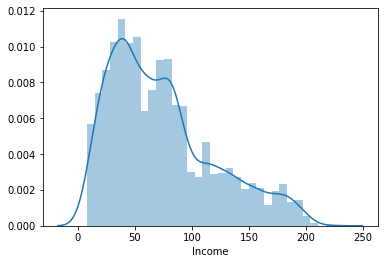

In [ ]:
#income seems to have skewed distribution
sns.distplot(data.Income)

In [ ]:
#credit card seems to have skewed distribution
sns.distplot(data.CCAvg)

In [ ]:
#mortgage seems to have symmetric distribution
sns.distplot(data.Mortgage)

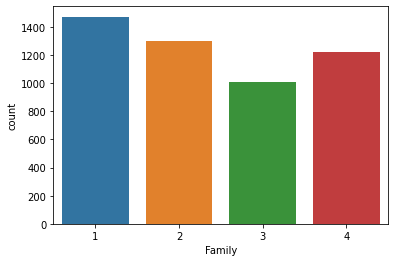

In [ ]:
sns.countplot(data.Family)

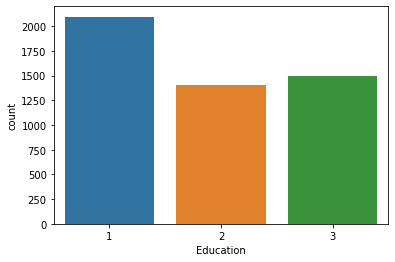

In [ ]:
sns.countplot(data.Education)

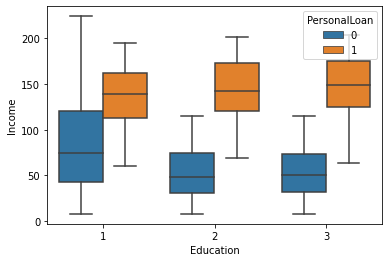

In [ ]:
#multivariant analysis
#customers who has more income is granted loan acrosss each education level
sns.boxplot(x='Education',hue='PersonalLoan', y='Income', data= data)

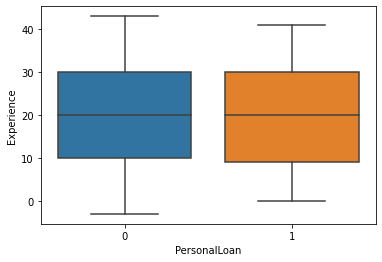

In [ ]:
sns.boxplot(x='PersonalLoan', y='Experience', data= data)

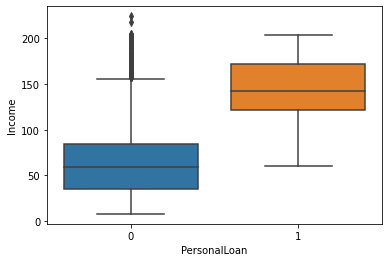

In [ ]:
sns.boxplot(x='PersonalLoan', y='Income', data= data)

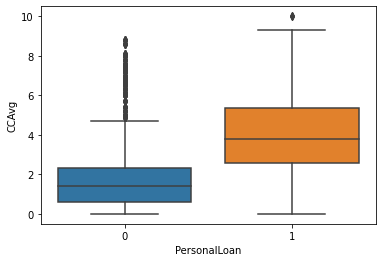

In [ ]:
sns.boxplot(x='PersonalLoan', y='CCAvg', data= data)

Family           1     2    3     4
PersonalLoan                       
0             1365  1190  877  1088
1              107   106  133   134


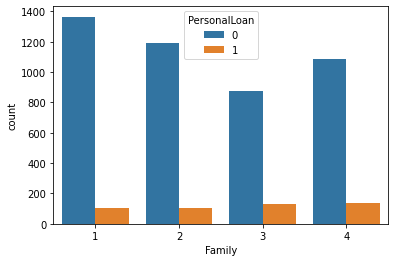

In [ ]:
#Family
print(pd.pivot_table(data=data,index='PersonalLoan',columns='Family',aggfunc='size'))
sns.countplot(x='Family', data=data, hue="PersonalLoan")

Education        1     2     3
PersonalLoan                  
0             2003  1221  1296
1               93   182   205


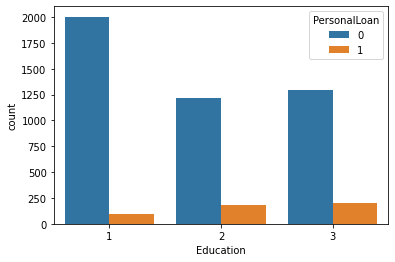

In [ ]:
#Education
print(pd.pivot_table(data=data,index='PersonalLoan',columns='Education',aggfunc='size'))
sns.countplot(x='Education', hue='PersonalLoan', data= data)

SecuritiesAccount     0    1
PersonalLoan                
0                  4058  462
1                   420   60


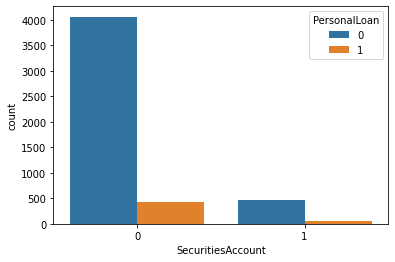

In [ ]:
#securities account 
#majority of people having security account dont have personal loan
print(pd.pivot_table(data=data,index='PersonalLoan',columns='SecuritiesAccount',aggfunc='size'))
sns.countplot(x="SecuritiesAccount", data=data, hue="PersonalLoan")

CDAccount        0    1
PersonalLoan           
0             4358  162
1              340  140


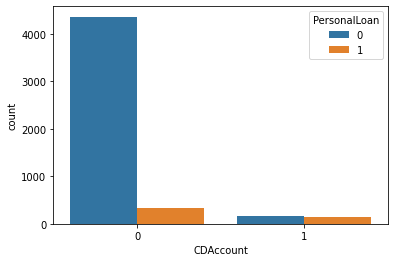

In [ ]:
#CDAccount
print(pd.pivot_table(data=data,index='PersonalLoan',columns='CDAccount',aggfunc='size'))
sns.countplot(x="CDAccount", data=data, hue="PersonalLoan")

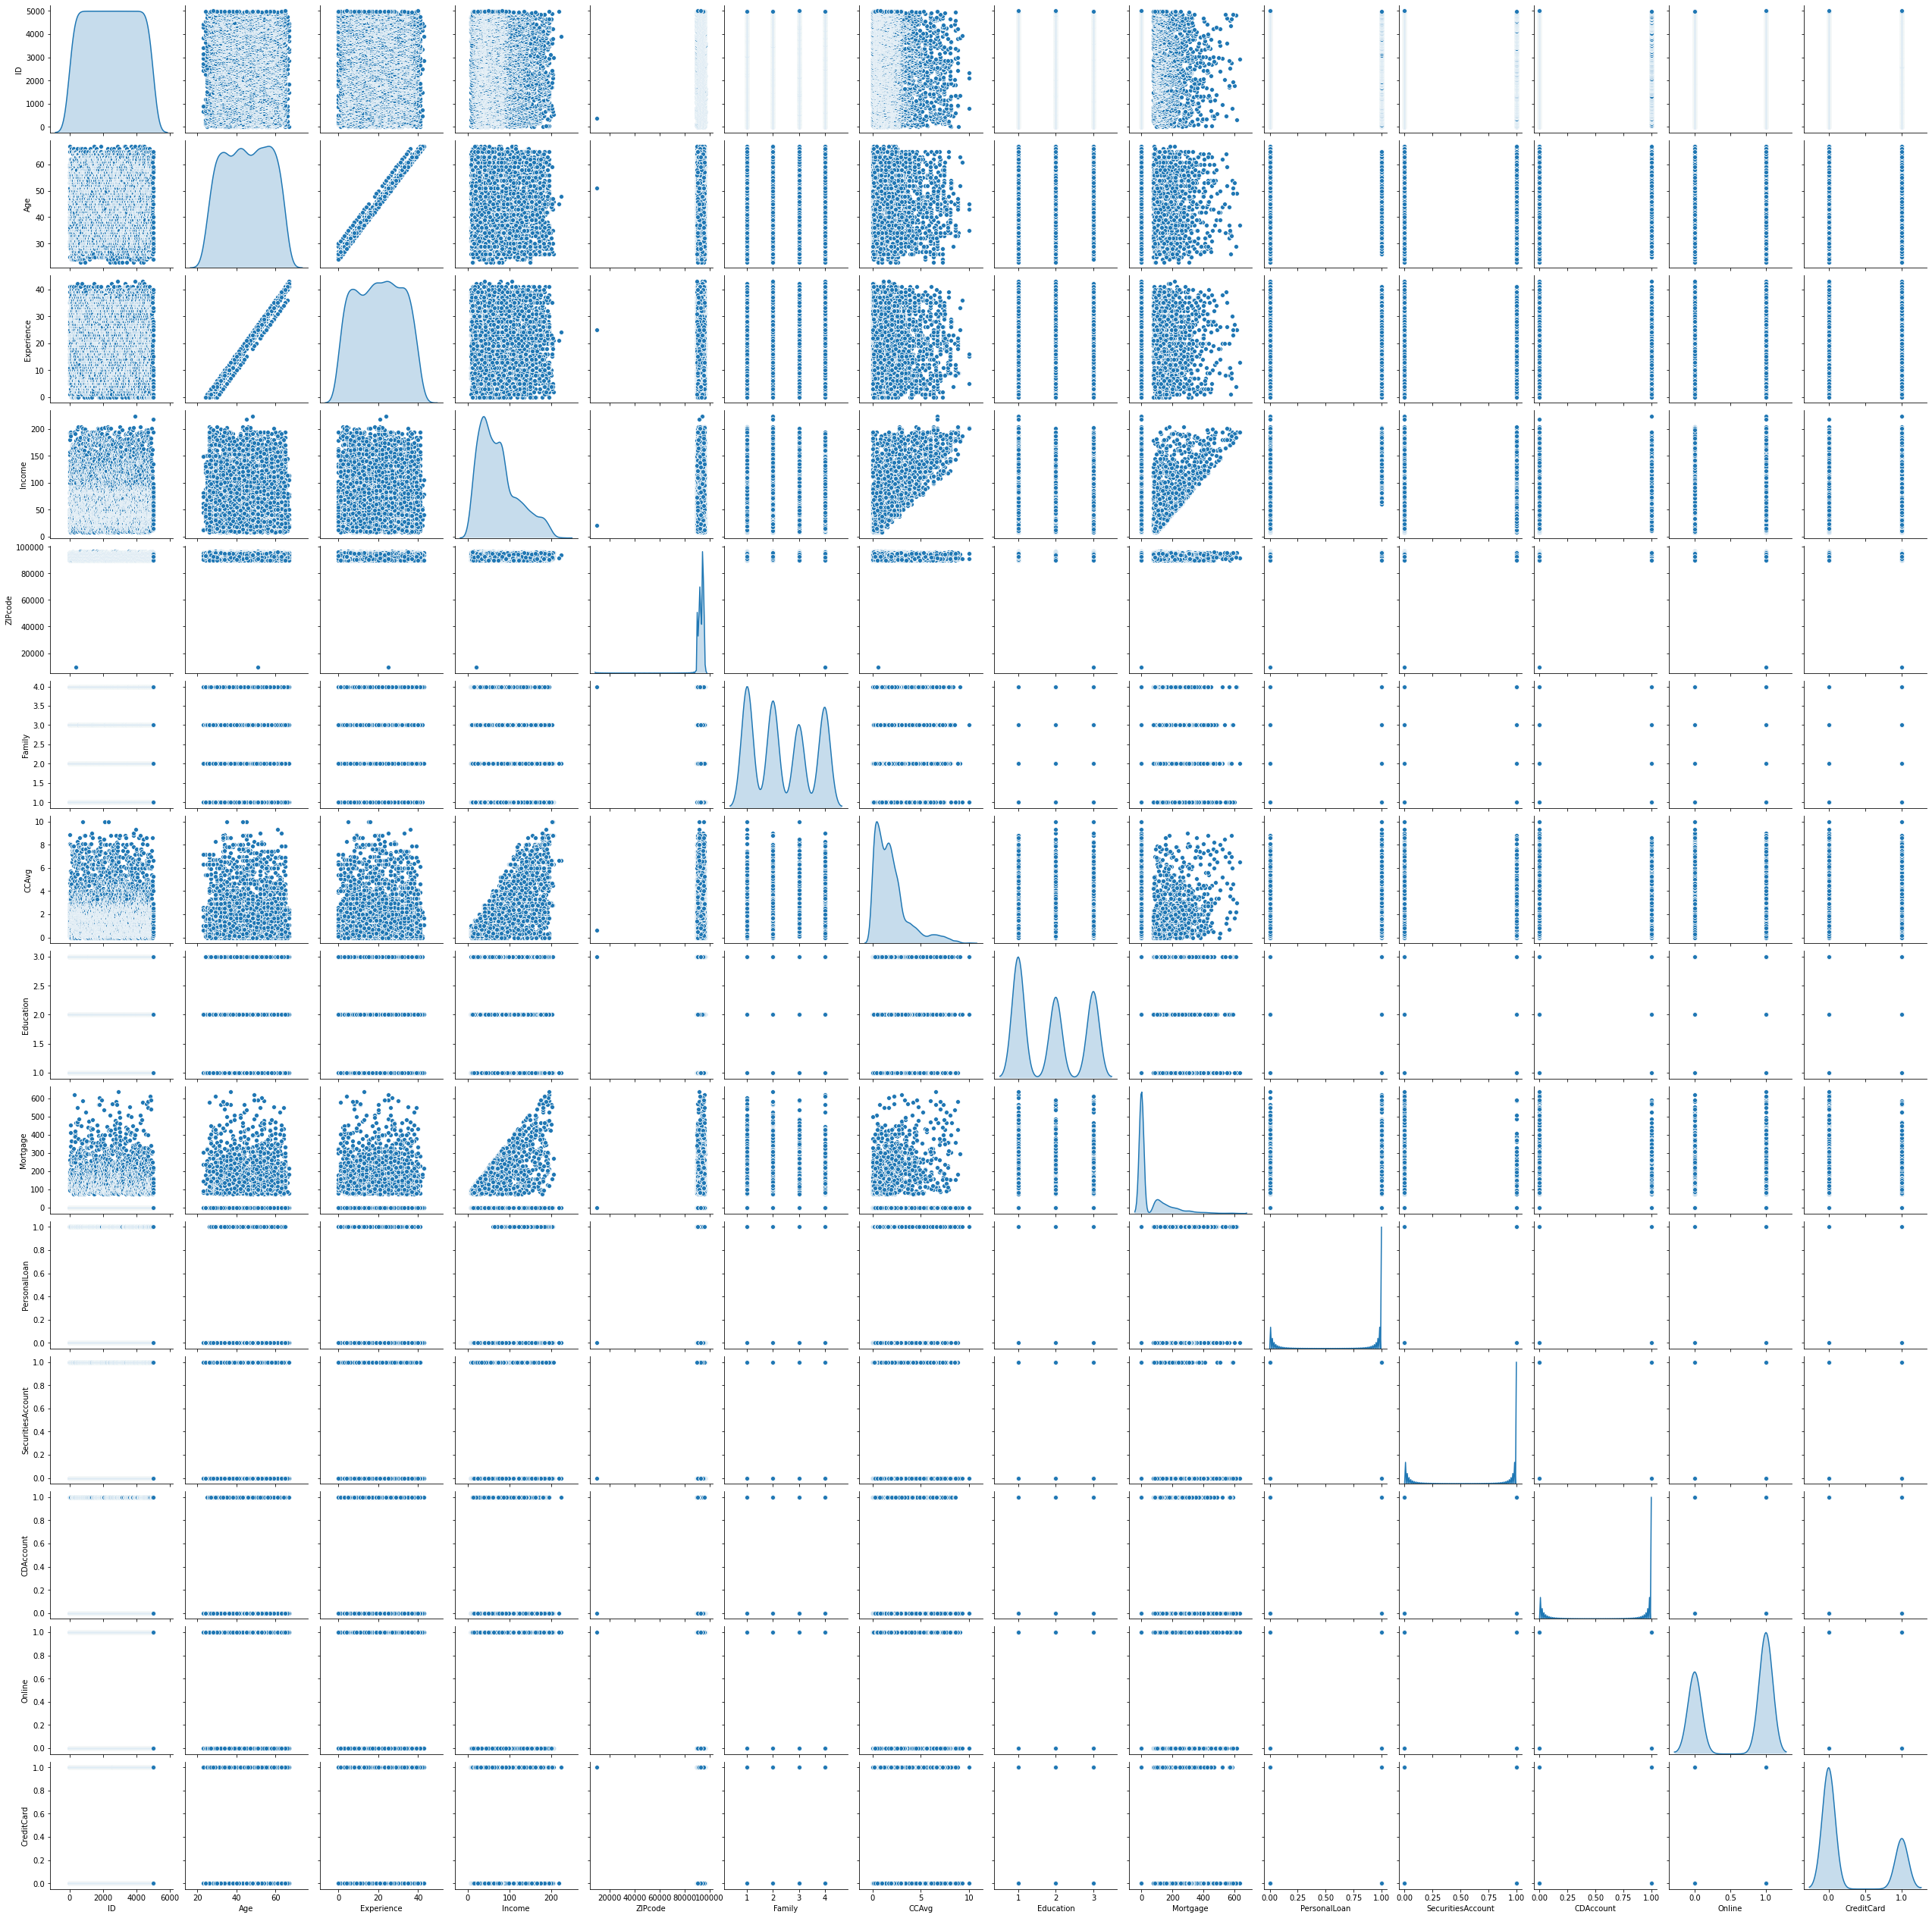

In [ ]:
sns.pairplot(data,diag_kind='kde')

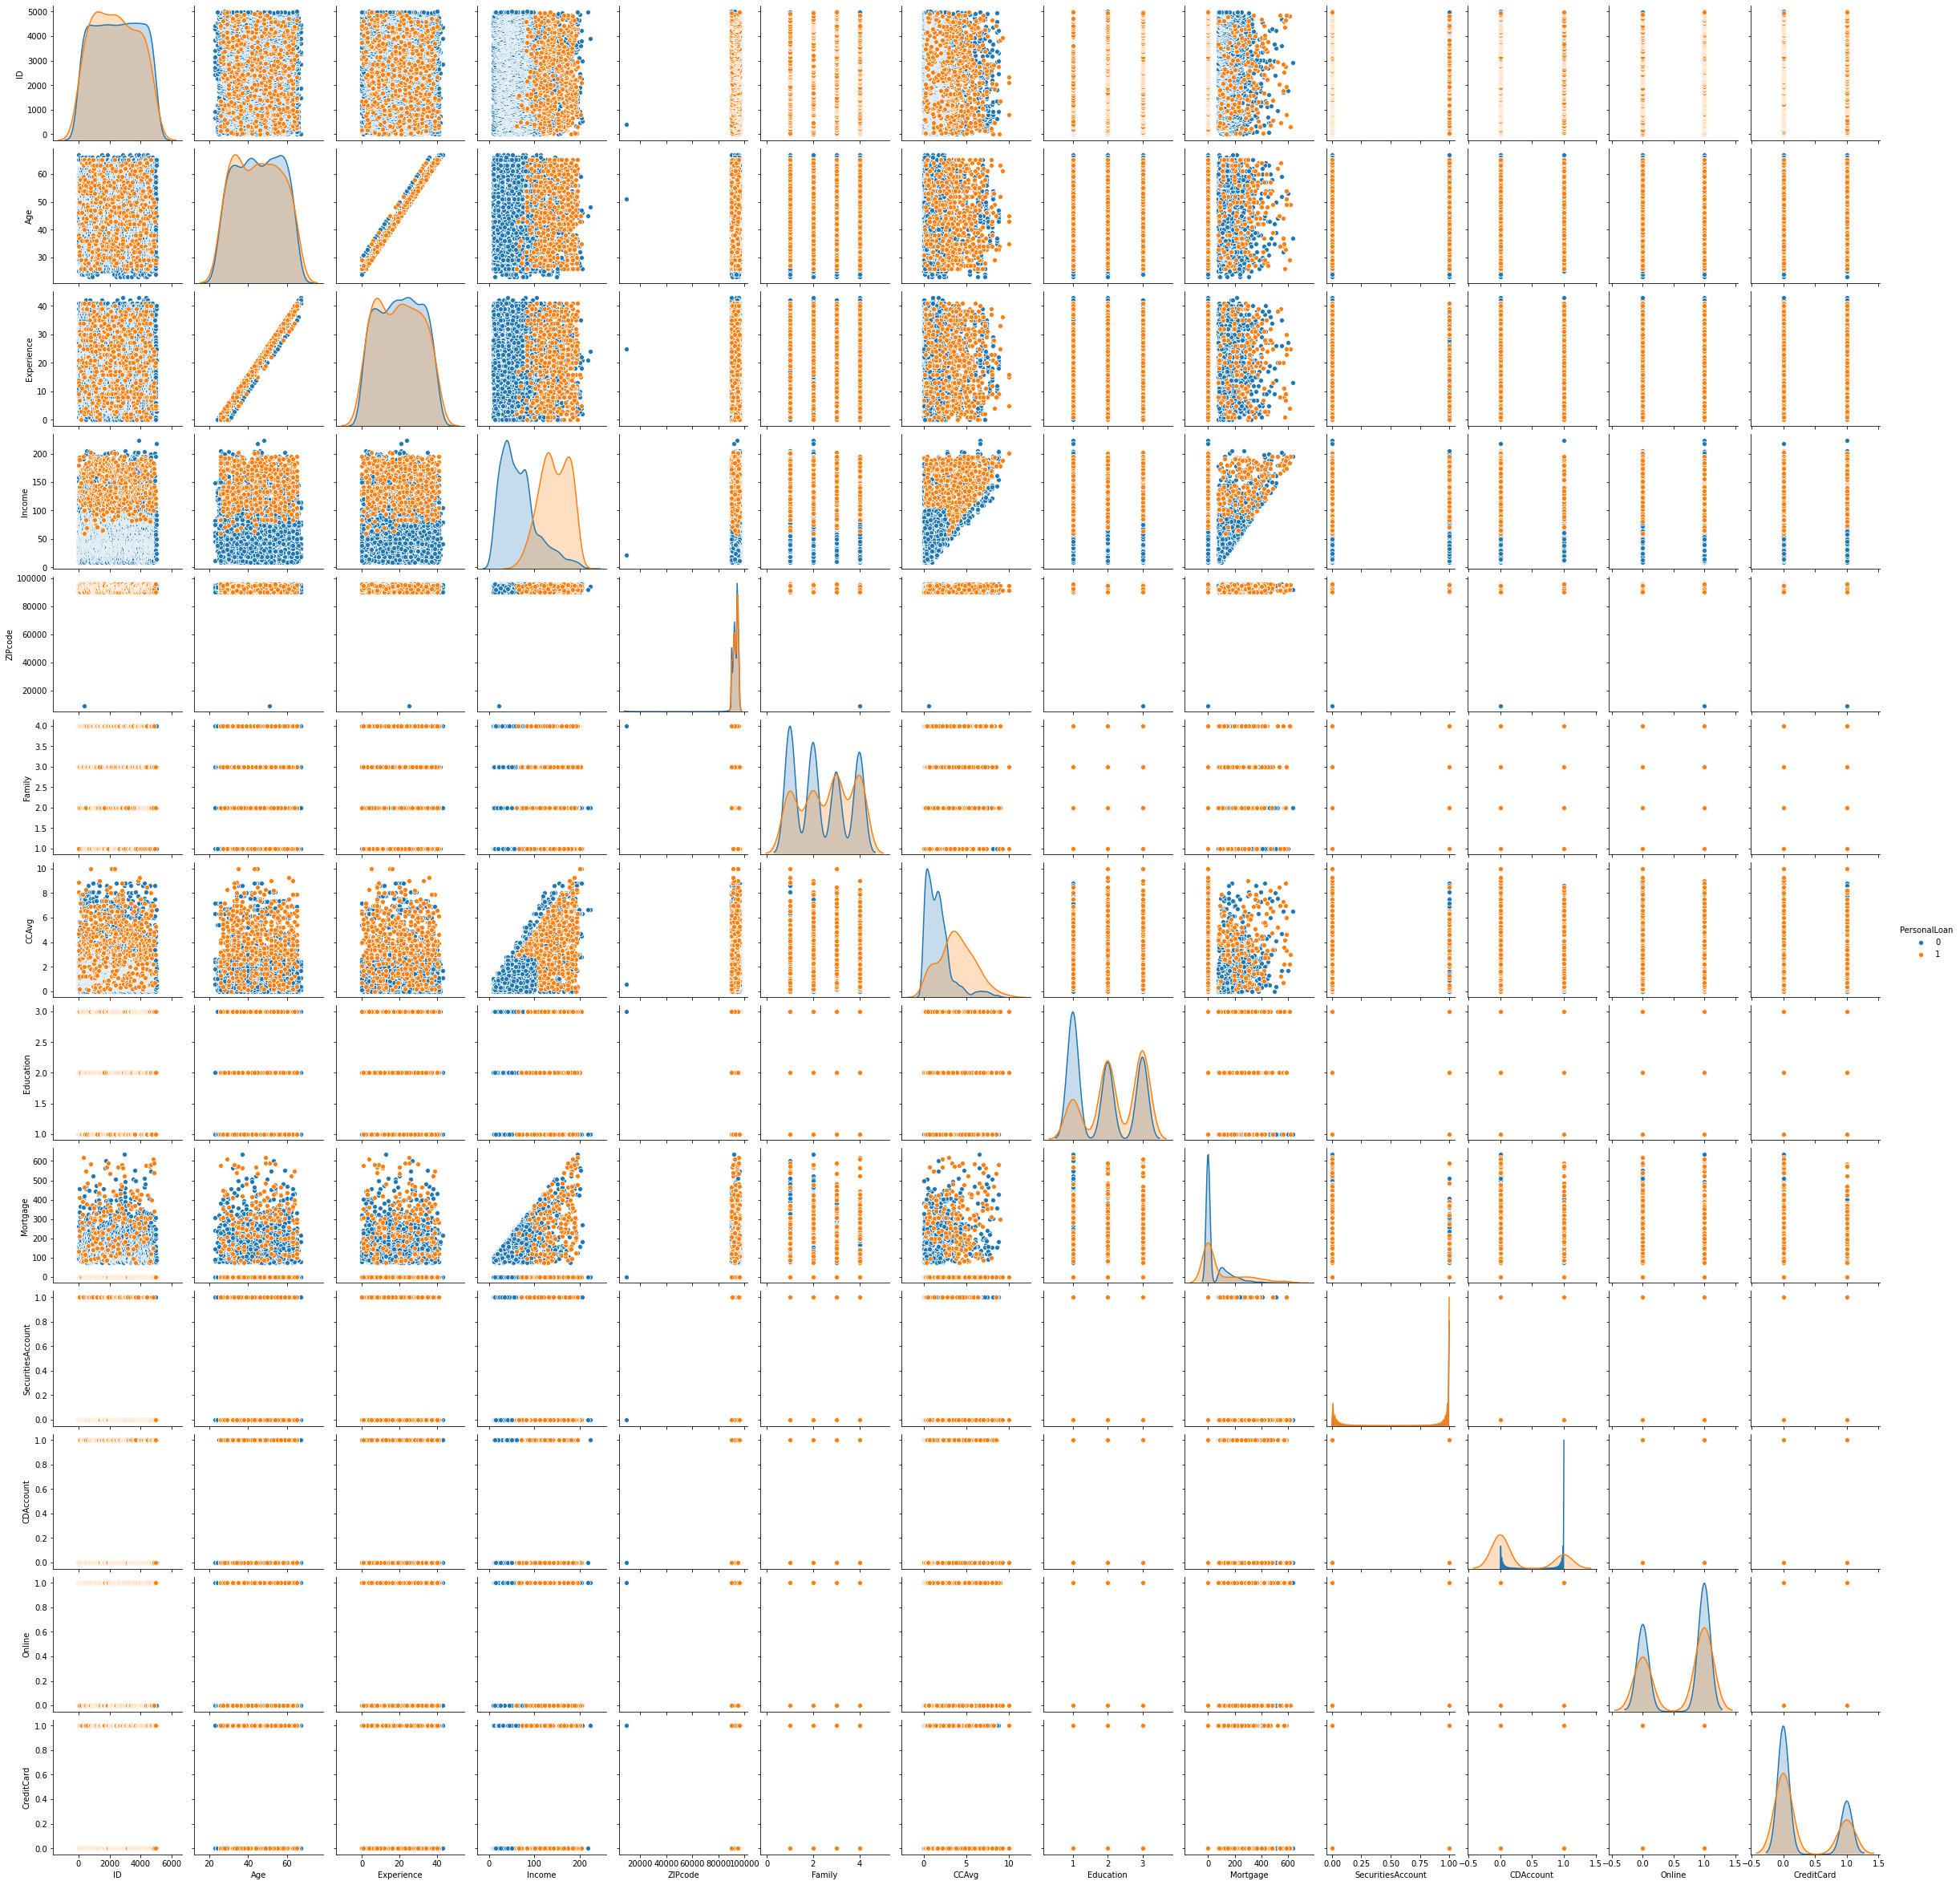

In [ ]:
sns.pairplot(data,diag_kind='kde',hue='PersonalLoan')

In [ ]:
#correlation
corr= data.corr()

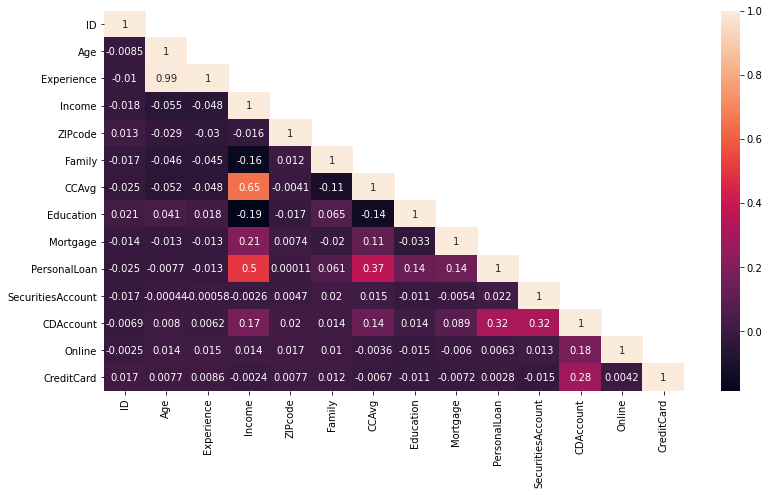

In [ ]:
#Correlation with heatmap
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(corr,mask= mask,annot= True)

In [ ]:
#Experience and age have very high correlation value which is expected.
#Income and CCAvg spend also have strong correlation value

In [ ]:
data.groupby(['PersonalLoan']).agg(['mean','median'])

ID                Age  ... Online CreditCard       
                     mean  median       mean  ... median       mean median
PersonalLoan                                  ...                         
0             2512.165487  2518.5  45.367257  ...      1   0.293584      0
1             2390.650000  2342.0  45.066667  ...      1   0.297917      0

[2 rows x 26 columns]

In [ ]:
data.groupby(['PersonalLoan']).agg(['min','max'])

ID       Age     Experience  ... CDAccount Online     CreditCard    
             min   max min max        min  ...       max    min max        min max
PersonalLoan                               ...                                    
0              1  5000  23  67        0.0  ...         1      0   1          0   1
1             10  4981  26  65        0.0  ...         1      0   1          0   1

[2 rows x 26 columns]

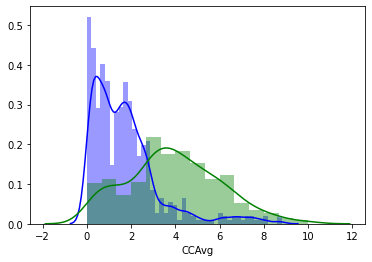

In [ ]:
sns.distplot(data[data.PersonalLoan == 0]['CCAvg'],color ='blue')
sns.distplot(data[data.PersonalLoan == 1]['CCAvg'],color ='green')

Text(0, 0.5, 'Age')

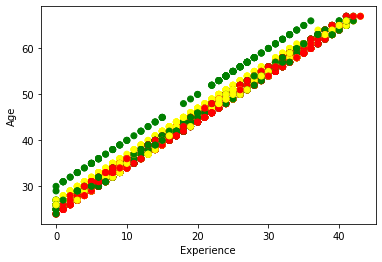

In [ ]:
#scatter plot 
fig, ax = plt.subplots()
colors ={1:'red',2:'yellow',3:'green'}
ax.scatter(data['Experience'],data['Age'],c =data['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

In [ ]:
data_x = data.loc[:,data.columns != "PersonalLoan"]
data_y = data[["PersonalLoan"]]

**4. Neccessary Transformation**

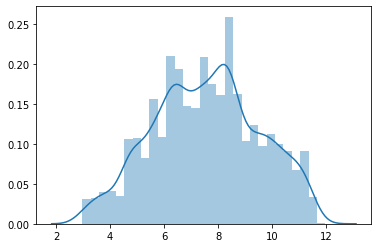

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_x["Income"].values.reshape(-1,1))
temp = pt.transform(data_x["Income"].values.reshape(-1,1))
sns.distplot(temp)

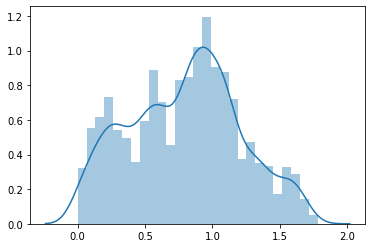

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_x["CCAvg"].values.reshape(-1,1))
temp = pt.transform(data_x["CCAvg"].values.reshape(-1,1))
sns.distplot(temp)

In [ ]:
data_x["Mortgage_Int"] = pd.cut(data_x["Mortgage"],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],
include_lowest=True)
data_x.drop("Mortgage",axis=1, inplace=True)

In [ ]:
data_x.head(5)

ID  Age  Experience  Income  ...  CDAccount  Online  CreditCard  Mortgage_Int
0   1   25         1.0      49  ...          0       0           0             0
1   2   45        19.0      34  ...          0       0           0             0
2   3   39        15.0      11  ...          0       0           0             0
3   4   35         9.0     100  ...          0       0           0             0
4   5   35         8.0      45  ...          0       0           1             0

[5 rows x 13 columns]

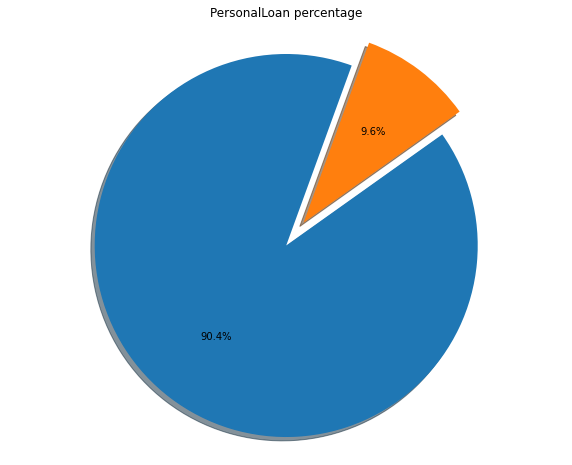

In [ ]:
#univariante analysis
#9.6% of all applicants get approved for personal loan
tempDF = pd.DataFrame(data["PersonalLoan"].value_counts()).reset_index()
tempDF.columns =["Lables","PersonalLoan"]
fig1, ax1 = plt.subplots(figsize=(10,8))
explode = (0,0.15)
ax1.pie(tempDF['PersonalLoan'],explode=explode, autopct ='%1.1f%%',shadow = True,startangle=70)
ax1.axis('equal')
plt.title("PersonalLoan percentage")
plt.show()

**5. Normalizing and splitting the data into training and test set in the ratio of 70:30 respectively**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data_x,data_y, test_size=0.3,stratify=data_y, random_state=0)

**6. Applying different classification models**  



*  logistic Regression

In [ ]:
LRM = LogisticRegression()
LRM.fit(x_train, y_train)
y_pred = LRM.predict(x_test)
lr_acc_scr = accuracy_score(y_test,y_pred)
lr_con_mat = confusion_matrix(y_test,y_pred)
lr_cla_rep = classification_report(y_test,y_pred)
print("Accuracy of the model is ",(lr_acc_scr*100))
print("Confusion matrix :\n",lr_con_mat)
print("Classification report of the model is :\n",lr_cla_rep)

Accuracy of the model is  90.93333333333334
Confusion matrix :
 [[1311   45]
 [  91   53]]
Classification report of the model is :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1356
           1       0.54      0.37      0.44       144

    accuracy                           0.91      1500
   macro avg       0.74      0.67      0.69      1500
weighted avg       0.90      0.91      0.90      1500



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Accuracy of logistic regression is 90.9%
# Precision and recall for class 1 is quite low

*  Naive Bayes model



In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)
y_pred = naive_model.predict(x_test)
nb_acc_scr = accuracy_score(y_test,y_pred)
print("Accuracy of the model is",nb_acc_scr*100)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report of model is :\n",classification_report(y_test,y_pred))

Accuracy of the model is 89.4
confusion matrix:
 [[1252  104]
 [  55   89]]
Classification report of model is :
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.46      0.62      0.53       144

    accuracy                           0.89      1500
   macro avg       0.71      0.77      0.73      1500
weighted avg       0.91      0.89      0.90      1500



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Accuracy of Naive bayes model is 89.4%
# Precision and recall for class 1 is very low as compared to class 0

*   KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(x_train, y_train)
y_pred = KNN_model.predict(x_test)
knn_acc_scr = accuracy_score(y_test,y_pred)
print("Accuracy of the model is",knn_acc_scr*100)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report of model is :\n",classification_report(y_test,y_pred))

Accuracy of the model is 89.46666666666667
confusion matrix:
 [[1337   19]
 [ 139    5]]
Classification report of model is :
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      1356
           1       0.21      0.03      0.06       144

    accuracy                           0.89      1500
   macro avg       0.56      0.51      0.50      1500
weighted avg       0.84      0.89      0.86      1500



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Accuracy of KNN model is 89.46%
# Precision and recall for class 1 is quite low as compared to class 0
# Accuracy is more as compared to Logistic regression and Naive Bayes model but less as compared to decision tree classifier

*   Decision Tree classifier



In [ ]:
#By using criterion = entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dt = DecisionTreeClassifier(criterion= "entropy",random_state=1)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
dtce_acc_scr = accuracy_score(y_test,y_pred)
print("entropy")
print("Accuracy of the model is",dtce_acc_scr*100)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report of model is :\n",classification_report(y_test,y_pred))

entropy
Accuracy of the model is 98.0
confusion matrix:
 [[1340   16]
 [  14  130]]
Classification report of model is :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.89      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
#By using criterion = gini
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dt = DecisionTreeClassifier(criterion= "gini",random_state=1)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
dtcg_acc_scr = accuracy_score(y_test,y_pred)
print("gini")
print("Accuracy of thee model is",dtcg_acc_scr*100)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report of model is :\n",classification_report(y_test,y_pred))

gini
Accuracy of thee model is 98.33333333333333
confusion matrix:
 [[1345   11]
 [  14  130]]
Classification report of model is :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.90      0.91       144

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
# Accuracy of Decision Tree Classifier model using 'entropy' is 98.33%
# Accuracy of Decision Tree Classifier model using 'gini' is 98.33%
# Precision and recall for class 1 is quite low as compared to class 0
# Accuracy is more compared to Logistic regression, Naive Bayes, KNN model



*   Random Forest classifier



In [ ]:
#criterion = 'entropy'
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion= "entropy",n_estimators=150,max_features=6,random_state=14,oob_score=True)
rf.fit(x_train,y_train)
print("The out of bag score is :",rf.oob_score)
y_pred = rf.predict(x_test)
rfce_acc_scr = accuracy_score(y_test,y_pred)
print("Accuracy of the model is",rfce_acc_scr*100)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report of model is :\n",classification_report(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


The out of bag score is : True
Accuracy of the model is 98.66666666666667
confusion matrix:
 [[1350    6]
 [  14  130]]
Classification report of model is :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.90      0.93       144

    accuracy                           0.99      1500
   macro avg       0.97      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



In [ ]:
#criterion = 'gini'
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion= "gini",n_estimators=150,max_features=6,random_state=14,oob_score=True)
rf.fit(x_train,y_train)
print("The out of bag score is :",rf.oob_score)
y_pred = rf.predict(x_test)
rfcg_acc_scr = accuracy_score(y_test,y_pred)
print("Accuracy of the model is",rfcg_acc_scr*100)
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification report of model is :\n",classification_report(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


The out of bag score is : True
Accuracy of the model is 98.4
confusion matrix:
 [[1348    8]
 [  16  128]]
Classification report of model is :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.94      0.89      0.91       144

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
# Accuracy of Random Forest Classifier is 98.4%.
# Precision and recall is 99% and 99% respectively.
# It has highest accuracy across all the other models.

**7.Comparison between different models.**

In [ ]:
df = pd.DataFrame({'Classification Algorithm ':['Logistic Regression','Naive Bayes','KNN',
'Decision Tree Classifier','Random Forest Classifier'] ,
'Accuracy (%)':[lr_acc_scr*100, nb_acc_scr*100, knn_acc_scr*100,dtcg_acc_scr*100, rfce_acc_scr*100]})

In [ ]:
print("Table of comparison between different algorithms(using scaled data) : ")
df

Table of comparison between different algorithms(using scaled data) : 


Classification Algorithm   Accuracy (%)
0       Logistic Regression     90.933333
1               Naive Bayes     89.400000
2                       KNN     89.466667
3  Decision Tree Classifier     98.333333
4  Random Forest Classifier     98.666667

**Conclusion-**

The objective of the project is to predict the likelihood of a liability customer buying personal
loans.We have implemented the five different models such as logistic regression, Naive bayes model, KNN, Decision tree classifier and random forest classifier.From the above table it is clear that random forest classifier has highest accuracy rate of all.It has accuracy of 98.6% and f1 score of 99%.